Para este análisis se usó un conjunto de datos en el que se detallan los obsequios a funcionarixs públicxs registradxs en el ámbito de la Oficina Anticorrupción.
<a href="https://datos.gob.ar/dataset/justicia-registro-obsequios-funcionarios-publicos" target="_blank">Fuente de datos</a>

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
import os
import numpy as np
import fuzzywuzzy
#import seaborn as sns  #not being used

from fuzzywuzzy import process
from os import path
from PIL import Image
from spacy.lang.es import Spanish
from spacy.lang.es.stop_words import STOP_WORDS
from wordcloud import WordCloud
from collections import Counter

In [24]:
# guardamos la ubicación para luego guardar imágenes que vamos a generar
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

data = pd.read_csv("./data/registro-obsequios-funcionarios-publicos-20201009.csv")
print('Cantidad de registros cargados: {}'.format(len(data)))

Cantidad de registros cargados: 3928


In [25]:
# limpieza y unificación de features
data["funcionario_nombre"] = data["funcionario_nombre_completo"].apply(str.title) + " " + data["funcionario_apellido_completo"].apply(str.title)
data["obsequio_descripcion"] = data["obsequio_descripcion"].str.lower()

In [26]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # obtener una lista de strings únicos
    strings = df[column].unique()
    
    # obtener el top 10 de similitudes más cercanas al string que estamos analizando
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # filtramos y nos quedamos sólo con las coincidencias con un ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # obtener las filas de las coincidencias en el dataframe
    rows_with_matches = df[column].isin(close_matches)

    # reemplazamos todas las filas con coincidencia por el string que estaoms analizandos
    df.loc[rows_with_matches, column] = string_to_match

In [34]:
Al ver los nombres de funcionarixs, podemos notar que hay "repetidxs", ya sea por diferente cantidad de espacios entre palabras, por uso (o no) de tildes y otras razones. <br/>
Para verificar ésto (y arreglarlo) vamos a usar <a href="https://github.com/seatgeek/fuzzywuzzy" target="_blank">fuzzywuzzy</a>. <br/><br/>
En la celda siguiente veremos cuántos nombres parecidos a "Matías Daniel Lammens Núñez". <br/>
El número que aparece junto a la variante del nombre es el porcentaje de similitud (se pueden elegir diferentes métodos para analizar cuan similares son, en este caso elegimos `token_sort_ratio`).

SyntaxError: invalid syntax (<ipython-input-34-1655de83f211>, line 1)

In [28]:
df = data["funcionario_nombre"].unique()
df.sort()

matches = fuzzywuzzy.process.extract("Matías Daniel Lammens Núñez", df, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
print(matches)

[('Matías Daniel Lammens Núñez', 100), ('Matias Daniel Lammens Núñez', 98), ('Matías Daniel Lammens Nuñez', 98), ('Matías Lammens', 70), ('Matias Lammens', 68), ('Diana Maria Guillen', 56), ('Daniel Meilan', 54), ('Ramón María Lanús', 53), ('Maria Gabriela Real', 51), ('Marta Gabriela Michetti', 51)]


In [6]:
print('Cantidad de nombres de funcionarixs')
print('Antes de la limpieza: {0}'.format(len(df)))

replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Alberto Angel Fernadez", min_ratio = 80)
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Germán Carlos Garavano", min_ratio=84)
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Matías Daniel Lammens Núñez", min_ratio=67)
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Patricia Bullrich", min_ratio=75)
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Agustin Dellagiovanna")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Alberto Jorge Triaca")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Carlos Vicente Ruá")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Cristina E. Fernández O Néstor C. irchner")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Cristián Roberto Dellepiane Rawson")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Damián Eduardo Arabia")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Dante Sica")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Fernando Félix Grasso")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Gustavo José Santos")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="José Lino Salvador Barañao")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Marcelo Gabriel Suárez Salvia")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Maria Inés Baque")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Marta Gabriela Michetti")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="María Eugenia Bielsa")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="María Lara González Carvajal")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Ramón Lanús")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Ramón María Lanús")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Ricardo Agustín Campero")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Roberto Salvarezza")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Rogelio Frigerio")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Santiago Tomás Bellomo")
replace_matches_in_column(df=data, column='funcionario_nombre', string_to_match="Mauricio Macri")

df = data["funcionario_nombre"].unique()
df.sort()
print('Después de la limpieza: {0}'.format(len(df)))

Cantidad de nombres de funcionarixs
Antes de la limpieza: 366
Después de la limpieza: 321


In [29]:
#since there are several roles with similar names / descriptions.. we need to unify them
data["funcionario_funcion"] = data["funcionario_funcion"].str.lower()
data["funcionario_funcion"] = data["funcionario_funcion"].str.strip()

def cleanTxt(text):
 text = text.replace("registro de obsequios- señor presidente de la nación",'señor presidente de la nación')
 text = text.replace("hija de la señora de macri", "hija de la señora primera dama, srita valentina barbier")
 text = text.replace("hija del presidente de la nación de la nación, srita. antonia macri", "hija del presidente de la nación, srita. antonia macri")
 text = text.replace("vicepreseidencia",'vicepresidente')
 return text

# Clean political roles
data["funcionario_funcion"] = data.funcionario_funcion.apply(cleanTxt)

In [8]:
# This code can be used to check repeated roles
#df = data["funcionario_funcion"].unique()
#df.sort()
#print(df)

In [9]:
# I used this to check similar roles and to determine the min_ratio I should use to replace what I want to be replaced
#df = data["funcionario_funcion"].unique()
#matches = fuzzywuzzy.process.extract("presidente", df, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
#print(matches)

In [30]:
df = data["funcionario_funcion"].unique()
df.sort()
print('Cantidad de roles de funcionarixs')
print('Antes de la limpieza: {0}'.format(len(df)))

replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="presidente de la nación", min_ratio = 88)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="presidencia de la nación", min_ratio=88)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="vicepresidente de la nación", min_ratio = 95)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="jefe de gabinete de ministros")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="hija del señor presidente, srita antonia macri", min_ratio = 64)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="directora nacional de ética pública")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministra de relaciones exteriores y culto", min_ratio = 85)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministro de producción y trabajo", min_ratio = 80)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministro de turismo y deportes")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministro de turismo")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretaría de ética pública transparencia y lucha contra la corrupción")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretaria de relaciones políticas y parlamentarias")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretario de economía social")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretario de gobierno de energia")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretario de seguridad interior")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretario general de la presidencia de la nación", min_ratio = 80)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="señora primera dama", min_ratio = 65)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="subsecretario de política exterior")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="subsecretario", min_ratio = 88)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="coordinador de relaciones institucionales con dependencia directa del ministerio de produccion")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="coordinador/a general")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="titular", min_ratio = 70)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="hija de la señora primera dama, srita valentina barbier", min_ratio = 62)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministro de educación, cultura, ciencia y tecnología", min_ratio=85)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministro de agricultura, ganadería y pesca de la nación", min_ratio=85)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministra de seguridad de la nación")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="jefa de gabinete")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="jefa del dpto de priv, e inmun, acred. y guía diplo", min_ratio=82)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministra de seguridad", min_ratio=78)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="presidente - aabe")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretario de agricultura, ganadería y pesca")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="secretario de coordinación de políticas públicas", min_ratio=79)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="supervisor de fiscalización")
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="ministro de educación y deportes de la nación", min_ratio=84)
replace_matches_in_column(df=data, column='funcionario_funcion', string_to_match="vicepresidente")

df = data["funcionario_funcion"].unique()
df.sort()
print('Después de la limpieza: {0}'.format(len(df)))

Cantidad de roles de funcionarixs
Antes de la limpieza: 295
Después de la limpieza: 212


In [31]:
def make_wordcloud(data, filename):
    wc = WordCloud(background_color="white", width=1000, height=500).generate_from_frequencies(data)
    plt.figure(figsize=(15,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    if filename:
        wc.to_file(path.join(d, filename+".png"))

                                                                   regalos
funcionario_nombre      funcionario_funcion                               
Mauricio Macri          Presidencia De La Nación                      1531
Alberto Angel Fernandez Presidencia De La Nación                       184
Jorge Faurie            Ministra De Relaciones Exteriores Y Culto      106
Germán C. Garavano      Ministro                                        97
Rogelio Frigerio        Ministro                                        93
Patricia Bullrich       Ministra De Seguridad                           75
Susana Malcorra         Ministra De Relaciones Exteriores Y Culto       70
Marcos Peña             Jefe De Gabinete De Ministros                   67
Mauricio Macri          Señora Primera Dama                             67
Alberto Jorge Triaca    Ministro                                        56


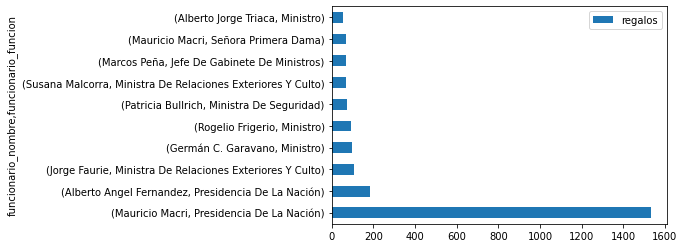

In [32]:
# we converted roles to downcase to clean and unify them.. now we convert them to CamelCase
data["funcionario_funcion"] = data["funcionario_funcion"].str.title()
gifts_received_by_role = data[["funcionario_nombre","funcionario_funcion"]].value_counts().to_frame('regalos')

print(gifts_received_by_role.head(10))
gifts_received_by_role.head(10).plot(kind = 'barh')
plt.show()

Al ver estos números, nos surgió la intriga de quiénes eran las personas que ocupaban cargos de ministrxs sin indicar el área en que trabajan y que recibieron tantos regalos como para estar en el top 10.

Según Wikipedia:
* **Germán Garavano** se desempeñó como  ministro de Justicia y Derechos Humanos de la República Argentina desde el 10 de diciembre de 2015 hasta el 9 de diciembre de 2019

* **Rogelio Frigerio** ocupó el cargo de Ministro del Interior, Obras Públicas y Vivienda del gobierno de Mauricio Macri desde el 10 de diciembre de 2015 hasta el 10 de diciembre de 2019.

* **Alberto Jorge Triaca** fue nombrado ministro de Trabajo en 2015 por Mauricio Macri,​ cargo que ocupó hasta 2018 cuando fue degradado a secretario de Trabajo del ministerio de Producción tras una reestructuración del gabinete.

Lxs 20 funcionarixs que más regalos recibieron


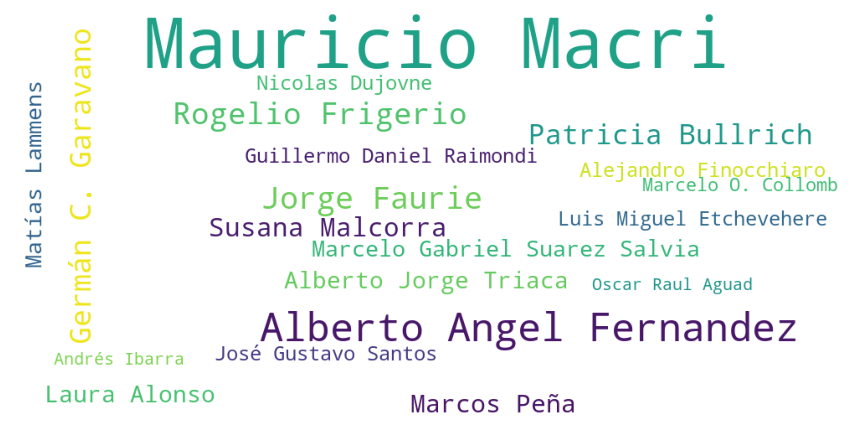

In [33]:
print("Lxs 20 funcionarixs que más regalos recibieron")
gift_by_func_counter = Counter(data.funcionario_nombre)
make_wordcloud(dict(gift_by_func_counter.most_common(20)))
#use it to save wordcloud as a file
#make_wordcloud(dict(gift_by_func_counter.most_common(20)), "roles_more_received_gifts_wordcloud") 

In [14]:
#gifts_by_value = data[["obsequio_valor_estimado","obsequio_tipo"]].groupby("obsequio_valor_estimado").count().sort_values("obsequio_tipo", ascending=False)
#print("Valor aproximado de 4 módulos: $4.000")
#print(gifts_by_value)

In [15]:
gifts_by_date = data[["obsequio_fecha_registro"]].value_counts()
print("Días con más regalos:")
print(gifts_by_date.head(5))
# print("Día con más regalos: {} {}".format(gifts_by_date.idxmax()[0], gifts_by_date.head(1).values))
print(data.loc[(data["obsequio_fecha_registro"]=="2018-11-16") & (data["obsequio_tipo"]=="Otros"), ["obsequio_descripcion", "obsequio_valor_estimado"]].head(10))

#TODO tiene algo que ver la fecha con la cantidad de regalos??

Días con más regalos:
obsequio_fecha_registro
2018-11-16                 69
2017-08-24                 64
2019-01-17                 52
2018-09-27                 47
2019-11-27                 45
dtype: int64
                                   obsequio_descripcion  \
2199            un (1) escultura de un pajaro de madera   
2205                 una (1) lapicera de madera grabada   
2207        una (1) maqueta de una bomba oleohidráuilca   
2209                                        un (1) mate   
2213                 una (1) pintura en oleo de bebidas   
2216                              un (1) móbil colgante   
2217      una (1) pintura "la bandera argentina de hoy"   
2218  una (1) bandeja de plata -un (1) libro "200 - ...   
2219                          un (1) cuadro de una coya   
2227       un (1) cuadro en oleo: "esfuerzo al trabajo"   

     obsequio_valor_estimado  
2199   Inferior a 4 módulos.  
2205   Inferior a 4 módulos.  
2207   Inferior a 4 módulos.  
2209   Inferior a

La Ley 25.188 de Ética en el Ejercicio de la Función Pública prohíbe a los funcionarios recibir obsequios o donaciones, con motivo o en ocasión del desempeño de sus funciones. <br/><br/>

Como excepción, pueden recibir aquellos obsequios que sean entregados por razones de cortesía o costumbre diplomática, pero sólo bajo las circunstancias establecidas en la referida ley y en el Decreto 1179/16 (Régimen de Obsequios a Funcionarios Públicos).<br/><br/>

Por su parte, todos los obsequios –admitidos por la ley 25.188- deben ser registrados y –cuando superan cierto valor (más de 4 módulos) o poseen significación institucional-, deben ser incorporados al patrimonio del Estado. <br/><br/>

<a target="_blank" href="https://desafiospublicos.argentina.gob.ar/normativa/nacional/decreto-1030-2016-265506/texto">Para saber cuál es el valor de un módulo clickeá acá!</a>


Cantidades de obsequios con un valor mayor a 4 módulos ($4.000)
                                   obsequio_descripcion
obsequio_tipo                                          
Objetos en general                                   54
Otros                                                48
Obras de arte                                        22
Joyería y relojería                                  15
Artesanías (productos regionales)                    10
Alimentos                                             6
Libros                                                4
Indumentaria                                          3
Electrónicos                                          1
Mobiliario                                            1


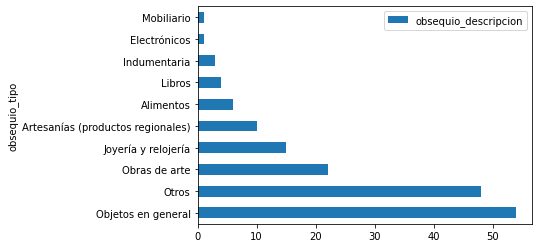

In [39]:
print("Cantidades de obsequios con un valor mayor a 4 módulos ($4.000)")
expensive_gifts = data[data.obsequio_valor_estimado=="Superior a 4 módulos o imposibilidad de determinar su valor."]

expensive_gifts_by_type = expensive_gifts[["obsequio_tipo", "obsequio_descripcion"]].groupby("obsequio_tipo").count().sort_values("obsequio_descripcion", ascending=False)

print(expensive_gifts_by_type)
expensive_gifts_by_type.plot(kind = 'barh')
plt.show()

In [17]:
print("Obsequios con un valor mayor a 4 módulos ($4.000)")
expensive_gifts["obsequio_descripcion"]
#TODO se podría averiguar valor de los regalos? aproximado?

Obsequios con un valor mayor a 4 módulos ($4.000)


28      bolígrafo - montblanc - pix rollerball blue - ...
65                                              alfombras
104                  alfombra fbmi - modelo sultan mamluk
107      pañuelo hermes 90cm mythiques phoenix coloriages
142     "una (1) tetera de porcelana pintada-cuatro (4...
                              ...                        
3683                                        4 cajas de té
3702                                     bandeja de plata
3703                                        4 cajas de té
3704    caja de lata que contiene: una mascarilla de s...
3709    un mate de calabaza con detalle de alpaca y un...
Name: obsequio_descripcion, Length: 164, dtype: object

In [18]:
# Create a function to clean gift descriptions
def cleanTxt(text):
 text = text.replace("inscripción provisoria por comunicación judicial (causa 9608/18 del juzg fed crim y corr 11) como fecha de recepción se indica la de dicha comunicación",'')
 text = text.replace(" -- ",'').replace("-",',').replace(" , ",', ')
 text = text.replace("\"",'')
 text = re.sub(r'\(([0-9]+)\)', '', text)
 text = re.sub(' +', ' ', text)
 text = text.strip()
 return text

# Clean gift descriptions
expensive_gifts["clean_obsequio_descripcion"] = expensive_gifts.obsequio_descripcion.apply(cleanTxt)

#print(expensive_gifts.obsequio_descripcion.unique())
print(expensive_gifts.clean_obsequio_descripcion.unique())

['bolígrafo, montblanc, pix rollerball blue, serie 114809 origen: alemania'
 'alfombras' 'alfombra fbmi, modelo sultan mamluk'
 'pañuelo hermes 90cm mythiques phoenix coloriages'
 'una tetera de porcelana pintada,cuatro tazas sin asa de porcelana pintada,una caramelera de porcelana'
 'plato de porcelana, elaborado con la técnica de porcelana tierna, material pasta tierna.'
 'cafetera clasica de la hospitaridad arabe presentada en base caoba'
 'cuadro de estilo abstracto'
 'un juego de té de porcelana pintada a mano compuesto por una tetera, un plato y cinco tacitas'
 'un cuadro de singapur en acuarela'
 'un centro de mesa cuadrado de vidrio con flores'
 'una fuente de metal plateado con la casa blanca grabada'
 'un cuadro de la universidad de pensilvania'
 'un cuadro de vidrio con la imagen de un caballo'
 'una billetera color bordeaux salvatore ferragamo'
 'un marco de cristal con el escudo de la república italiana'
 'una fotografía del árbol jacaranda del autor matías costa'
 'una li

In [19]:
#tokenize gifts descriptions and remove spanish stopwords
nlp = Spanish(path=None)
#TODO consumir api de ML para obtener precio random de regalos?

for i in range(len(expensive_gifts)):
  gift = expensive_gifts[["clean_obsequio_descripcion"]].iloc[i][0]
  doc = nlp(gift)
  #tokens = [token.text for token in doc if not token.is_stop]
  tokens = [token for token in doc]
  print(tokens)

[bolígrafo, ,, montblanc, ,, pix, rollerball, blue, ,, serie, 114809, origen, :, alemania]
[alfombras]
[alfombra, fbmi, ,, modelo, sultan, mamluk]
[pañuelo, hermes, 90, cm, mythiques, phoenix, coloriages]
[una, tetera, de, porcelana, pintada, ,, cuatro, tazas, sin, asa, de, porcelana, pintada, ,, una, caramelera, de, porcelana]
[plato, de, porcelana, ,, elaborado, con, la, técnica, de, porcelana, tierna, ,, material, pasta, tierna, .]
[cafetera, clasica, de, la, hospitaridad, arabe, presentada, en, base, caoba]
[cuadro, de, estilo, abstracto]
[un, juego, de, té, de, porcelana, pintada, a, mano, compuesto, por, una, tetera, ,, un, plato, y, cinco, tacitas]
[un, cuadro, de, singapur, en, acuarela]
[un, centro, de, mesa, cuadrado, de, vidrio, con, flores]
[una, fuente, de, metal, plateado, con, la, casa, blanca, grabada]
[un, cuadro, de, la, universidad, de, pensilvania]
[un, cuadro, de, vidrio, con, la, imagen, de, un, caballo]
[una, billetera, color, bordeaux, salvatore, ferragamo]
[un,

In [20]:
stop_words = [token.text for token in doc if token.is_stop]
STOP_WORDS.update(stop_words)
print(STOP_WORDS.intersection(stop_words))

{'un', 'de', 'con', 'una'}


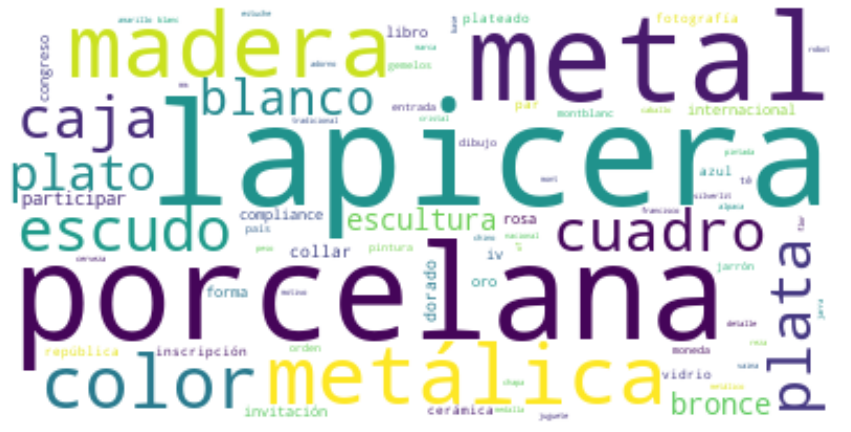

In [21]:
# word cloud visualization
allWords = ' '.join(expensive_gifts.clean_obsequio_descripcion)

wordCloud = WordCloud(background_color="white", random_state=21, stopwords=STOP_WORDS, collocations=False)

## uncomment to mask the generated wordcloud in a gift contour
#gift_mask = np.array(Image.open(path.join(d, "gift_mask.png")))
#wordCloud = WordCloud(background_color="white", random_state=21, stopwords=STOP_WORDS, mask=gift_mask, contour_width=2, contour_color="steelblue", collocations=False)

wordCloud.generate(allWords)

#show
plt.figure(figsize=(15,8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
## uncomment to mask the generated wordcloud in a gift contour
#plt.imshow(gift_mask, cmap=plt.cm.gray, interpolation="bilinear")
#plt.axis("off")
plt.show()

#store to file
#wordCloud.to_file(path.join(d, "christmas_for_politicians.png"))

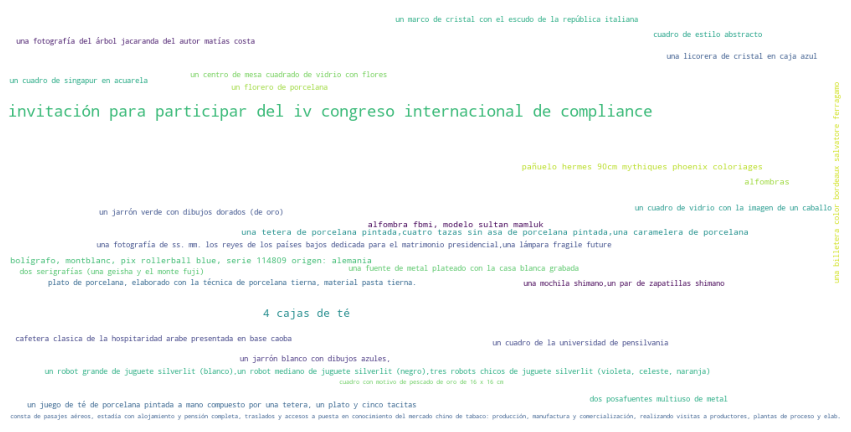

In [22]:
#generate wordCloud from full gift description
word_could_dict = Counter(expensive_gifts.clean_obsequio_descripcion)
make_wordcloud(dict(word_could_dict.most_common(30)))
#use it to save wordcloud as a file
#make_wordcloud(dict(word_could_dict.most_common(30)), "gifts_wordCloud_from_frequencies")